<h1><font color='green'>Libraries</font></h1> 

In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import mlxtend
from mlxtend.preprocessing import TransactionEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

<h1><font color='green'>Lets add style to our plots</font></h1>

In [2]:
plt.style.use('fivethirtyeight')

<h1><font color='green'>Loading Data...</font></h1>

In [3]:
data = pd.read_csv("03.Cleaned Mental Health.csv").drop(['Unnamed: 0'], axis = 1)
data

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
0,0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1,0,4,4,39,1.0,United Kingdom,United Kingdom,Back-end Developer,3
1,0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,1,0,3,29,1.0,United States of America,United States of America,Back-end Developer|Front-end Developer,0
2,0,25.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,1,4,4,38,1.0,United Kingdom,United Kingdom,Back-end Developer,1
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,3,3,43,1.0,United Kingdom,United Kingdom,Supervisor/Team Lead,3
4,0,25.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,1,1,3,3,43,0.0,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,4,4,34,0.0,United States of America,United States of America,Other,3
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,3,1,56,1.0,United States of America,United States of America,Support,3
1430,0,500.0,1.0,1.0,1.0,1.0,2.0,-2.0,2.0,2.0,...,1,1,0,3,52,1.0,United States of America,United States of America,Back-end Developer,3
1431,0,500.0,0.0,2.0,0.0,1.0,2.0,-2.0,2.0,0.0,...,1,0,3,1,30,0.0,United States of America,United States of America,DevOps/SysAdmin,3


<h3><font color='red'>for unique object values in columns</font></h3>

In [4]:
def unique_object_values_in_columns(df):
    for c in df.columns:
        if df[c].dtypes == 'object':
            print(c,':',df[c].unique())

<h4>lets check shape</h4>

In [5]:
data.shape

(1433, 45)

In [6]:
data.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,mh_diagnos_proffesional,mh_sought_proffes_treatm,mh_eff_treat_impact_on_work,mh_not_eff_treat_impact_on_work,age,sex,country_live,country_work,work_position,remote_flag
0,0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1,0,4,4,39,1.0,United Kingdom,United Kingdom,Back-end Developer,3
1,0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1,1,0,3,29,1.0,United States of America,United States of America,Back-end Developer|Front-end Developer,0
2,0,25.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,1,4,4,38,1.0,United Kingdom,United Kingdom,Back-end Developer,1
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,3,3,43,1.0,United Kingdom,United Kingdom,Supervisor/Team Lead,3
4,0,25.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,1,1,3,3,43,0.0,United States of America,United States of America,Executive Leadership|Supervisor/Team Lead|Dev ...,3


<h3><font color='orange'>for work position</font></h3>

<h4>lets look to the work position</h4>

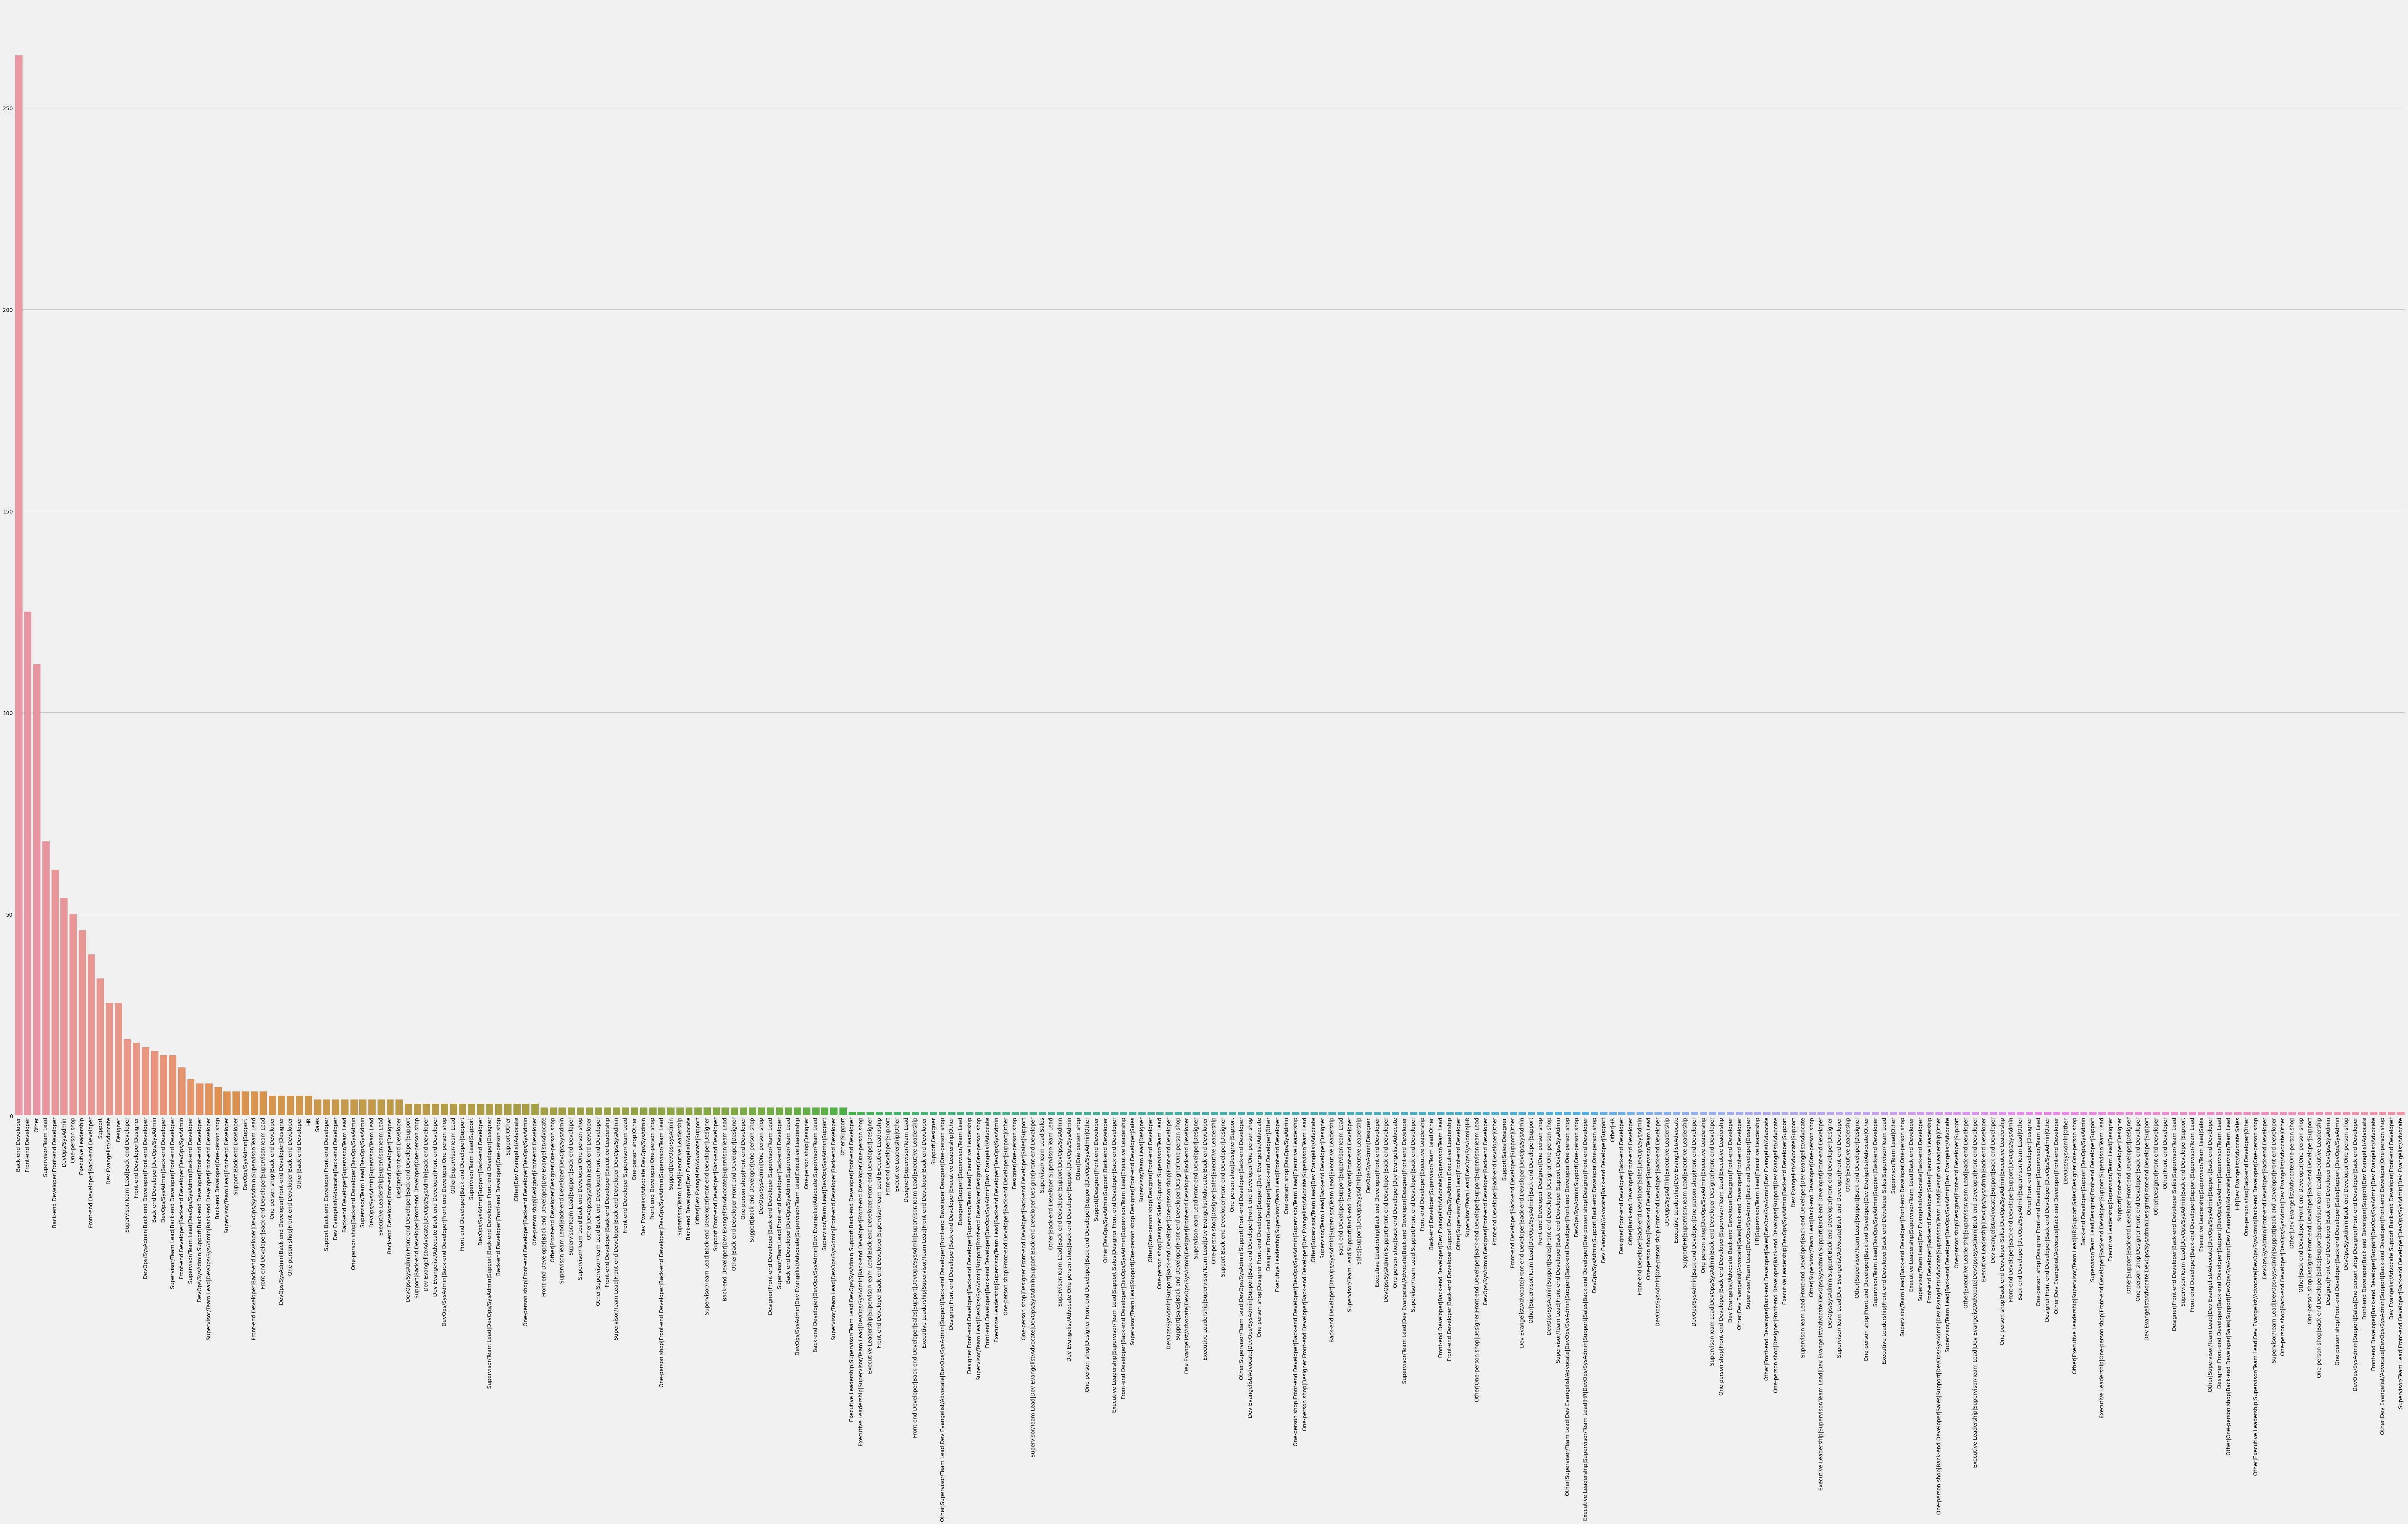

In [7]:
plt.figure(figsize = (100,50))
plt.xticks(rotation = 90)
sns.barplot(data['work_position'].value_counts().index, data['work_position'].value_counts().values)

<h4>its look like we got many data so lets calculate unique profession</h4>

In [8]:
tech_list = data['work_position'].value_counts().index.to_list()

<h4>now lets make data according to unique entries</h4>

In [9]:
l = []
for e in data['work_position']:
    l1 = []
    for i in e.split('|'):
        for j in i.split('/'):
            l1.append(j)
    l.append(l1)
l    

[['Back-end Developer'],
 ['Back-end Developer', 'Front-end Developer'],
 ['Back-end Developer'],
 ['Supervisor', 'Team Lead'],
 ['Executive Leadership',
  'Supervisor',
  'Team Lead',
  'Dev Evangelist',
  'Advocate',
  'DevOps',
  'SysAdmin',
  'Support',
  'Back-end Developer',
  'Front-end Developer'],
 ['DevOps',
  'SysAdmin',
  'Support',
  'Back-end Developer',
  'Front-end Developer',
  'Designer'],
 ['Back-end Developer'],
 ['Dev Evangelist', 'Advocate', 'Back-end Developer'],
 ['Support', 'Back-end Developer', 'One-person shop'],
 ['One-person shop', 'Front-end Developer', 'Back-end Developer'],
 ['Front-end Developer'],
 ['Executive Leadership'],
 ['Supervisor',
  'Team Lead',
  'Dev Evangelist',
  'Advocate',
  'Back-end Developer',
  'Front-end Developer'],
 ['DevOps', 'SysAdmin', 'Back-end Developer', 'Front-end Developer'],
 ['Designer'],
 ['Other', 'Executive Leadership'],
 ['Front-end Developer'],
 ['Back-end Developer'],
 ['One-person shop'],
 ['Back-end Developer', '

<h1><font color='green'>Encoding on Work position</font></h1> 

<h4>lets make a object first</h4>

In [10]:
TE = TransactionEncoder()

<h4>Now lets transform it and save to variable</h4> 

In [11]:
data1 = TE.fit(l).transform(l)

In [12]:
data1 = pd.DataFrame(data = data1, columns = TE.columns_).replace([True,False],[1,0])
data1.head(5)

,Advocate,Back-end Developer,Designer,Dev Evangelist,DevOps,Executive Leadership,Front-end Developer,HR,One-person shop,Other,Sales,Supervisor,Support,SysAdmin,Team Lead
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,1,1,0,1,1,1,1,0,0,0,0,1,1,1,1


<h4>we got out data frame but lets delete to original data</h4>

In [13]:
data.drop(['work_position'], axis = 1, inplace= True)

<h4>ready to join with original data</h4>

In [14]:
data = data.join(data1)

In [15]:
data.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,Executive Leadership,Front-end Developer,HR,One-person shop,Other,Sales,Supervisor,Support,SysAdmin,Team Lead
0,0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
2,0,25.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
4,0,25.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,1,1,0,0,0,0,1,1,1,1


In [16]:
unique_object_values_in_columns(data)

country_live : ['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Australia']
country_work : ['United Kingdom' 'United States of America' 'Canada' 'Germany'
 'Netherlands' 'Australia']


<h1><font color='green'>One Hot Encoding on country live</font></h1>

<h4><font color='orange'>on country_live column</font></h3>

<h4>Create Obj</h4>

In [17]:
OHE = OneHotEncoder(sparse = False)

<h4>Lets Transform</h4>

In [18]:
data_t1 = OHE.fit_transform(data[['country_live']])

C:\Users\YASHADA\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
col1 = []
for e in OHE.categories_[0]:
    col1.append('live_in_' + str(e))

In [20]:
data_t1 = pd.DataFrame(data = data_t1, columns = col1)
data_t1.head(5)

,live_in_Australia,live_in_Canada,live_in_Germany,live_in_Netherlands,live_in_United Kingdom,live_in_United States of America
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
data.drop(['country_live'], axis = 1, inplace= True)

<h4>join to original data</h4>

In [22]:
data = data.join(data_t1)
data.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,Supervisor,Support,SysAdmin,Team Lead,live_in_Australia,live_in_Canada,live_in_Germany,live_in_Netherlands,live_in_United Kingdom,live_in_United States of America
0,0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,25.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,0,25.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,1,1,1,1,0.0,0.0,0.0,0.0,0.0,1.0


<h1><font color='green'>Label Binarizer on country work</font></h1>

<h4><font color='orange'>on country work column</font></h3>

<h4>Create Obj</h4>

In [23]:
LB = LabelBinarizer()

<h4>Lets Transform</h4>

In [24]:
data_t2 = LB.fit_transform(data['country_work'])

In [25]:
col2 = []
for e in LB.classes_:
    col2.append('work_at_' + str(e))

<h4>join to original data</h4>

In [26]:
data_t2 = pd.DataFrame(data = data_t2, columns = col2)
data_t2

,work_at_Australia,work_at_Canada,work_at_Germany,work_at_Netherlands,work_at_United Kingdom,work_at_United States of America
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
1428,0,0,0,0,0,1
1429,0,0,0,0,0,1
1430,0,0,0,0,0,1
1431,0,0,0,0,0,1


In [27]:
data.drop(['country_work'], axis = 1, inplace= True)

In [28]:
data = data.join(data_t2)
data.head(5)

,self_empl_flag,comp_no_empl,tech_comp_flag,mh_coverage_flag,mh_employer_discussion,mh_resources_provided,mh_anonimity_flag,mh_medical_leave,mh_discussion_neg_impact,ph_discussion_neg_impact,...,live_in_Germany,live_in_Netherlands,live_in_United Kingdom,live_in_United States of America,work_at_Australia,work_at_Canada,work_at_Germany,work_at_Netherlands,work_at_United Kingdom,work_at_United States of America
0,0,100.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,0
1,0,25.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1
2,0,25.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0,0,0,0,1,0
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0,0,0,0,1,0
4,0,25.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0,0,0,0,0,1


In [29]:
unique_object_values_in_columns(data)

<h1><font color='green'>filling nan by Simple Inputer Tech</font></h1>

In [30]:
data.isnull().sum()

self_empl_flag                        0
comp_no_empl                        287
tech_comp_flag                      287
mh_coverage_flag                    287
mh_employer_discussion              287
                                   ... 
work_at_Canada                        0
work_at_Germany                       0
work_at_Netherlands                   0
work_at_United Kingdom                0
work_at_United States of America      0
Length: 69, dtype: int64

<h4>this ara the null values uptil now</h4>

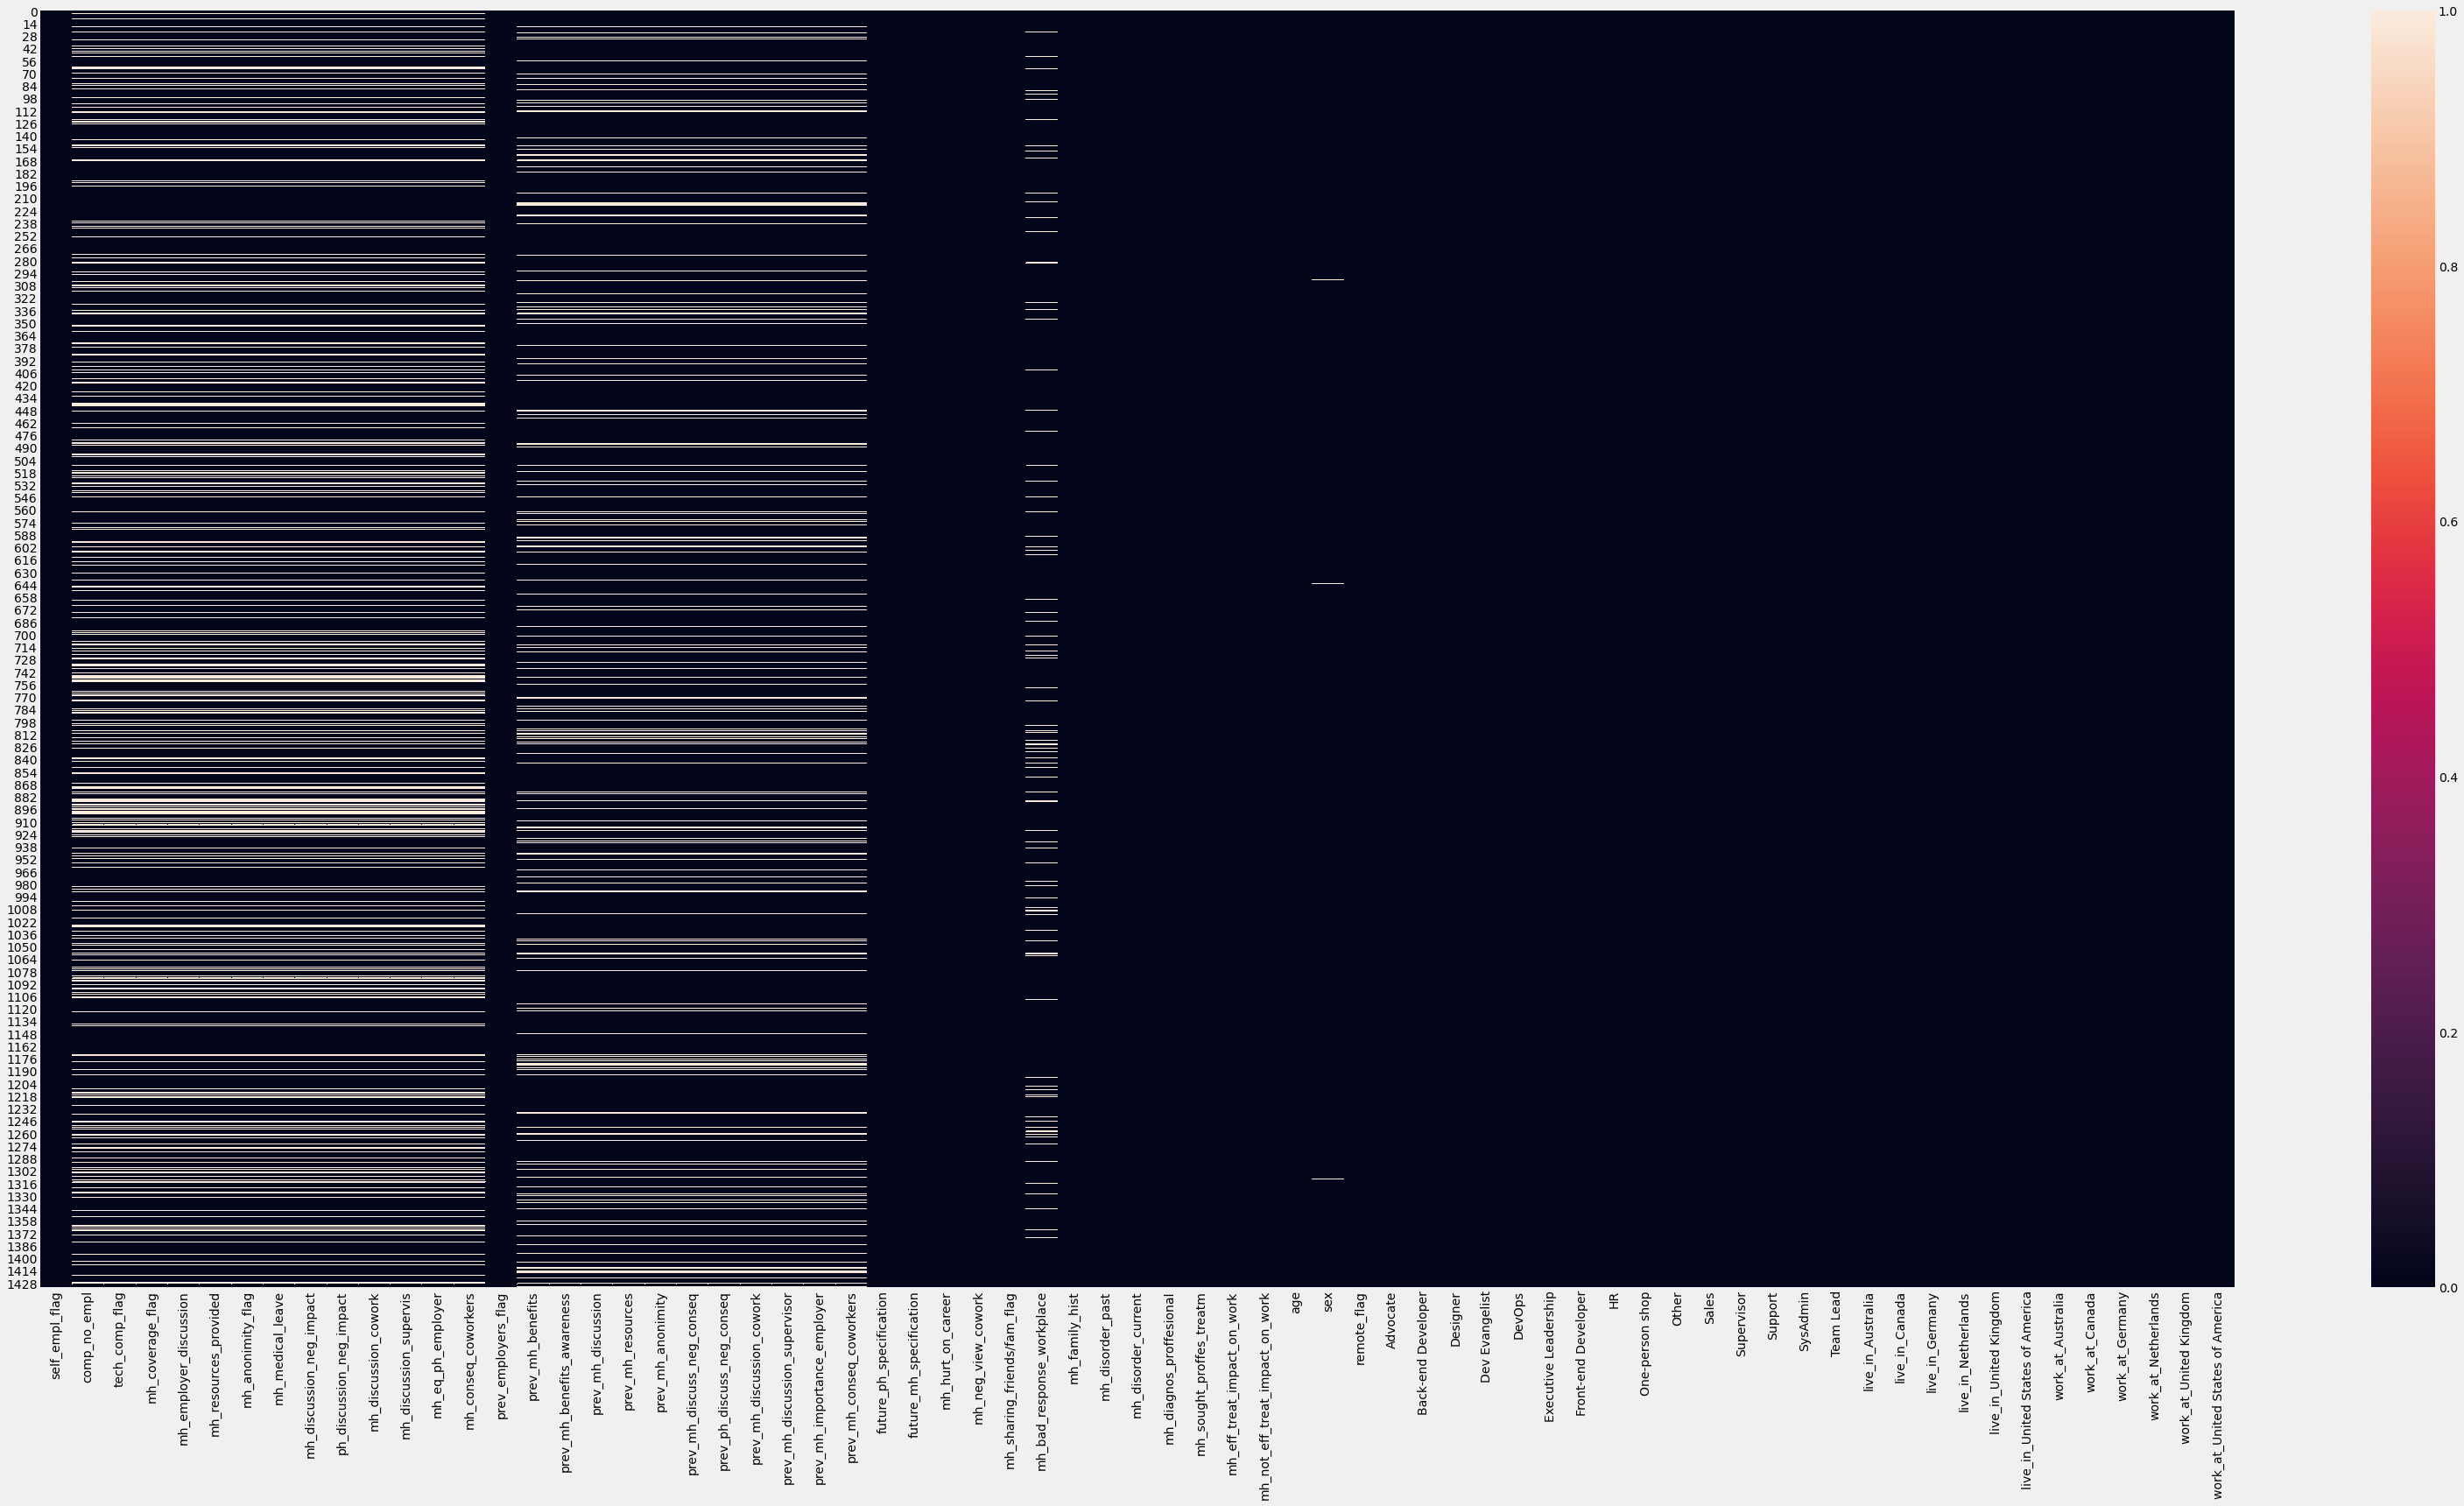

In [31]:
plt.figure(figsize = (50,25))
sns.heatmap(data.isnull())

In [32]:
temp1 = data.isnull().sum()

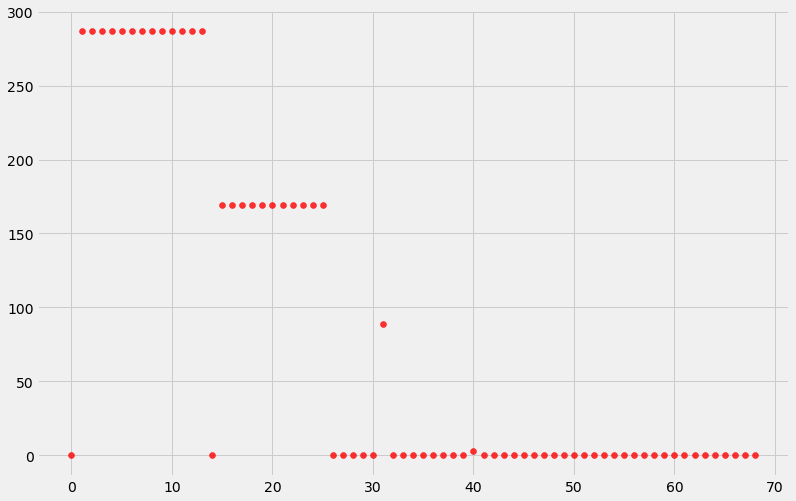

In [33]:
plt.figure(figsize = (12,8))
#plt.plot(range(len(temp1.values)),[169]*len(temp1.values), alpha = 0.5, linewidth = 1.8, color = 'green')
plt.scatter(range(len(temp1.values)),temp1.values,alpha = 0.8,color = 'red')

<h4>Creating Object and transforming</h4>

In [34]:
SI = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data = pd.DataFrame(data = SI.fit_transform(data), columns = data.columns)

<h4>now if look the Heatmap no null entries are remained</h4>

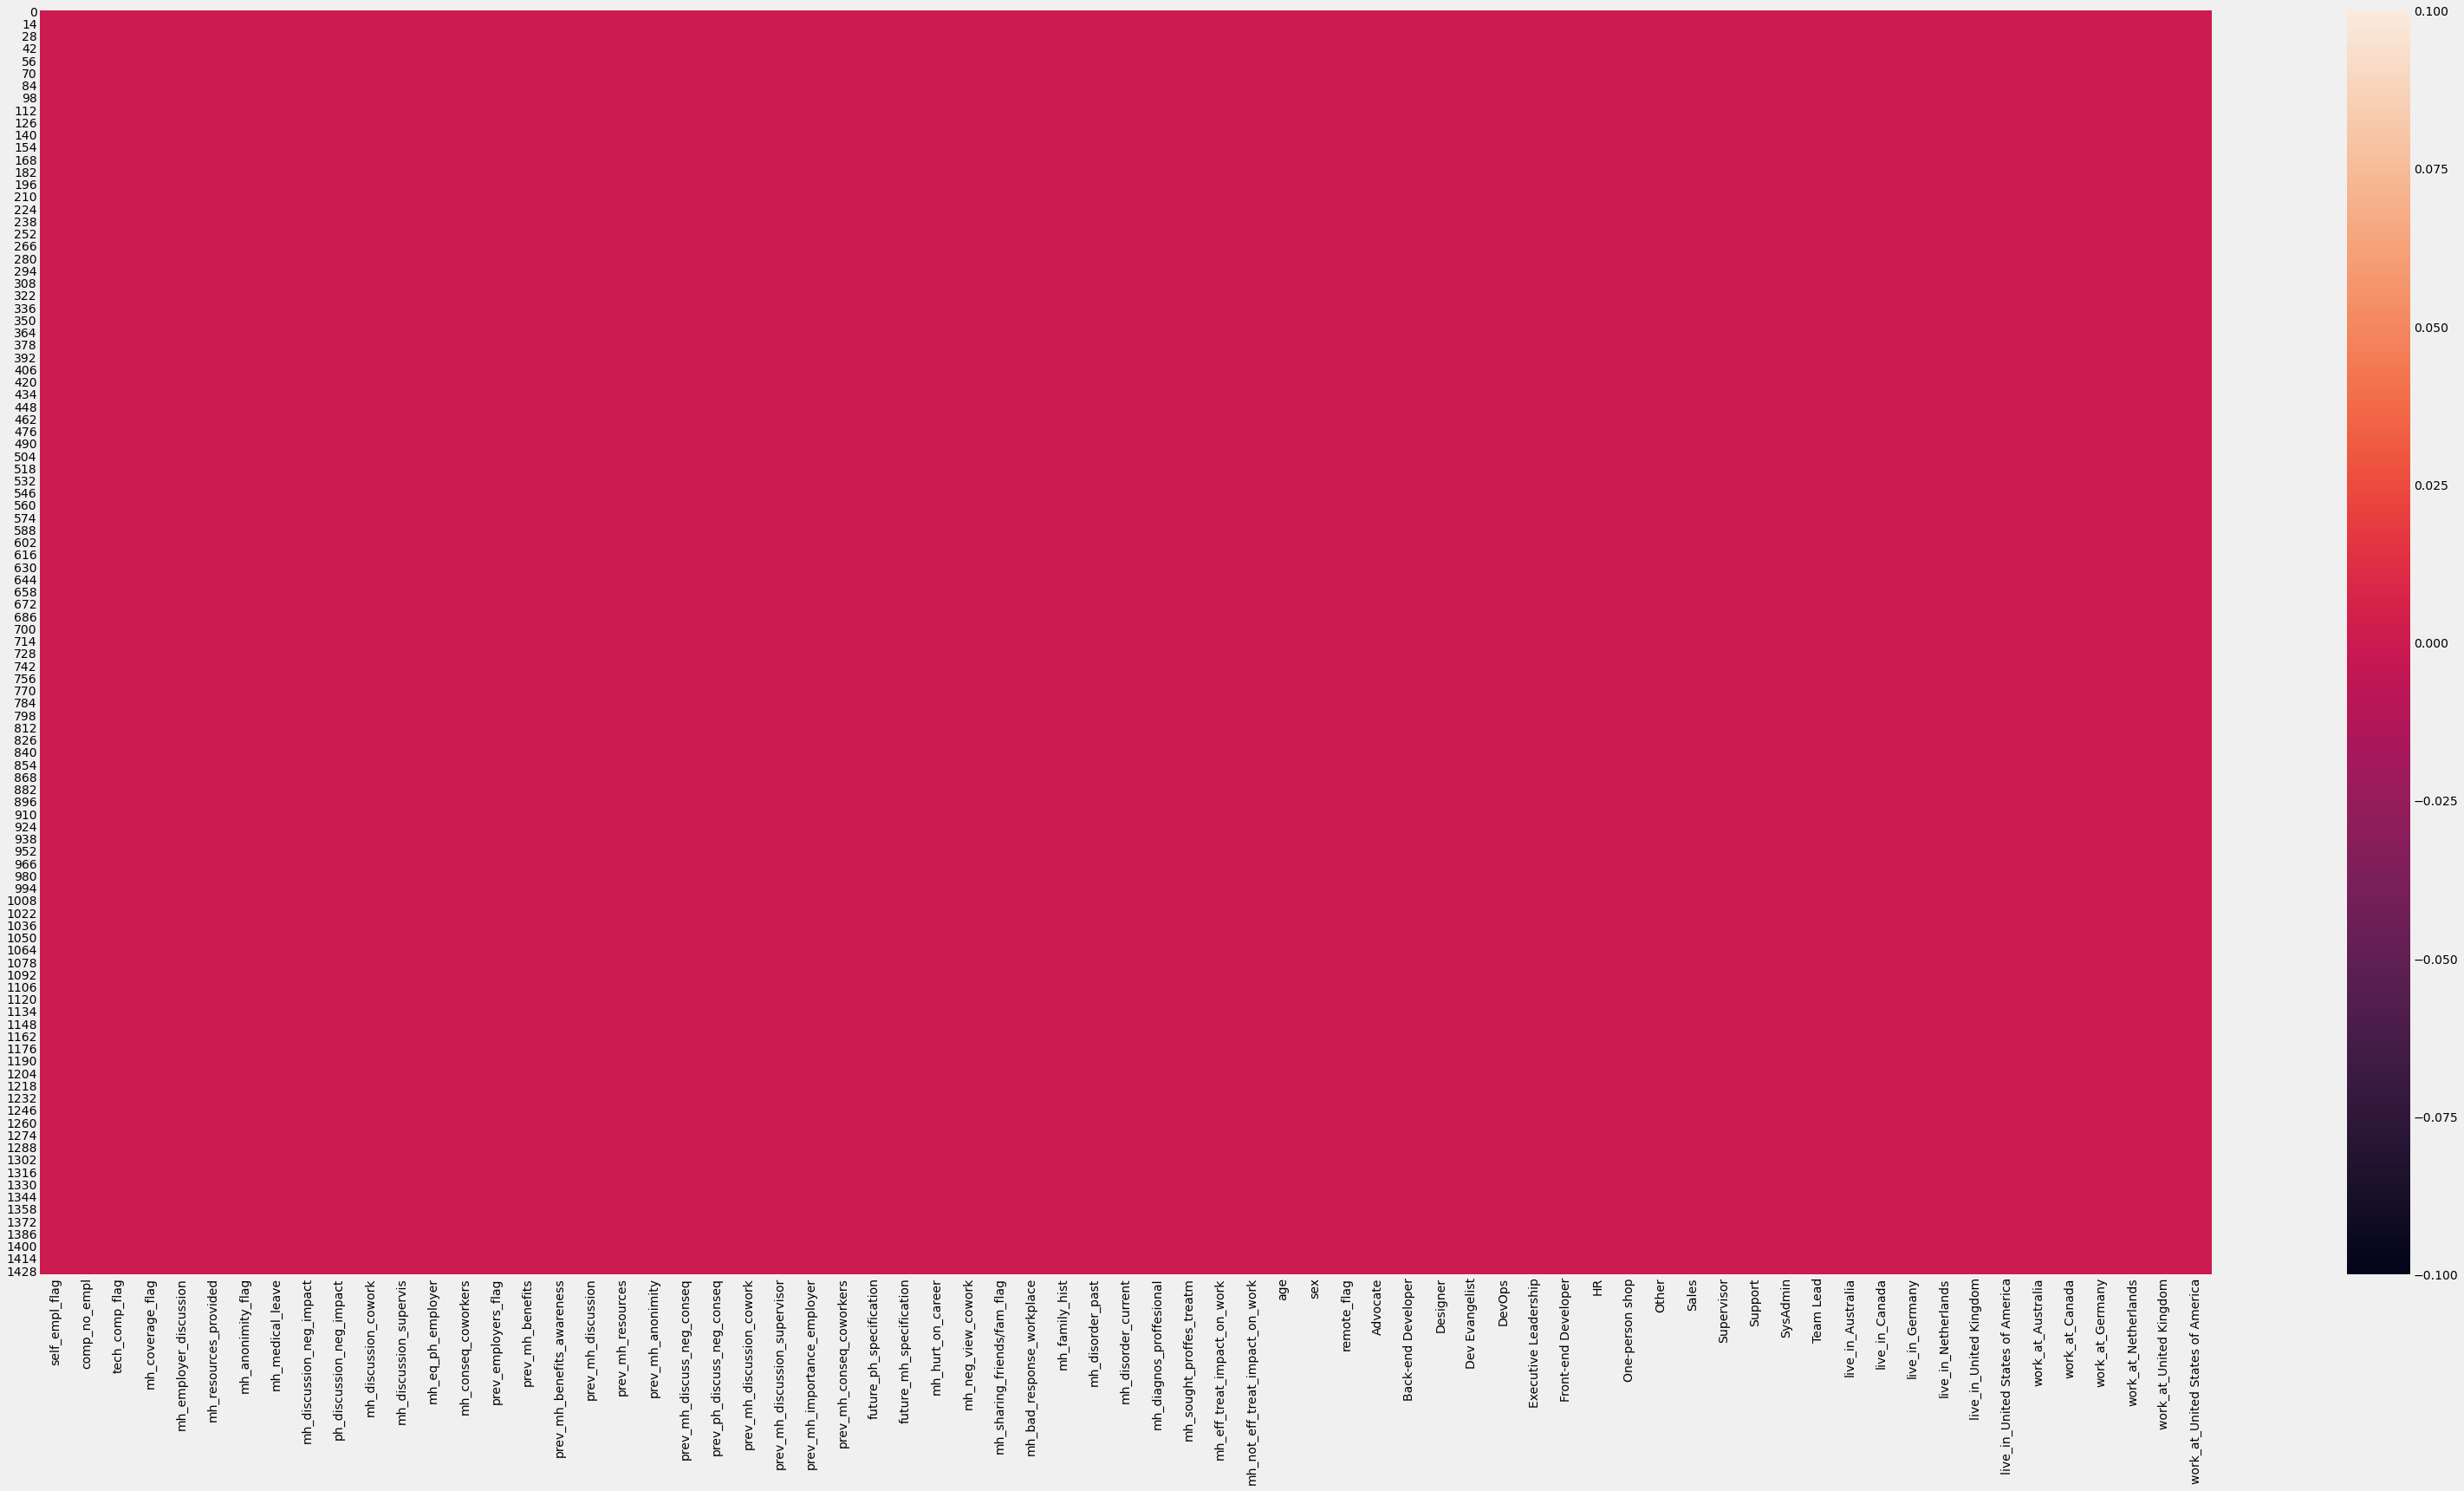

In [35]:
plt.figure(figsize = (50,25))
sns.heatmap(data.isnull())

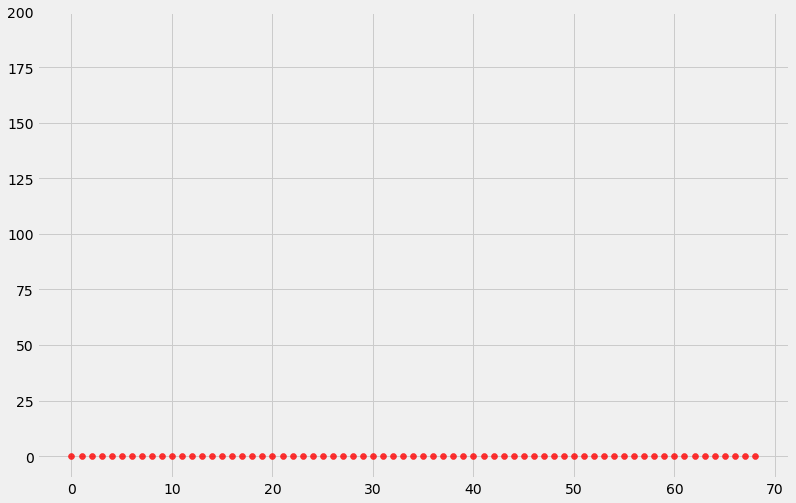

In [36]:
temp1 = data.isnull().sum()
plt.figure(figsize = (12,8))
plt.ylim(-10,200)
plt.scatter(range(len(temp1.values)),temp1.values,alpha = 0.8,color = 'red')

In [37]:
data.dtypes

self_empl_flag                      float64
comp_no_empl                        float64
tech_comp_flag                      float64
mh_coverage_flag                    float64
mh_employer_discussion              float64
                                     ...   
work_at_Canada                      float64
work_at_Germany                     float64
work_at_Netherlands                 float64
work_at_United Kingdom              float64
work_at_United States of America    float64
Length: 69, dtype: object

In [38]:
data.dtypes[data.dtypes != 'float64'].sum()

0

<h1><font color='green'>StandardScaler Normalization</font></h1>

<h4><font color='orange'>on comp_no_empl columns</font></h3>

<h4>create object</h4>

In [39]:
SS = StandardScaler()

In [40]:
SS.fit(data[['comp_no_empl']])

StandardScaler()

In [41]:
data['comp_no_empl'] = pd.DataFrame(SS.transform(data[['comp_no_empl']]))

<h1><font color='green'>MinMaxScaler Normalization</font></h1>

<h4><font color='orange'>on age columns</font></h3>

<h4>create object</h4>

In [42]:
MMS = MinMaxScaler()

In [43]:
MMS.fit(data[['age']])

MinMaxScaler()

In [44]:
data['age'] = pd.DataFrame(MMS.transform(MMS.transform(data[['age']])))

C:\Users\YASHADA\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [45]:
data.to_csv("05.Normalized Mental Health.csv")